In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Tarp/Organ_Records.csv")
df1.head()

,Unnamed: 0,donorAge,receiverAge,DonorBG,RecBG,D_Organ,R_Organ,D_Virology,R_Virology,MatchOrNot
0,1,35,38,A,AB,Liver,Liver,0,0,1
1,2,39,45,O,B,Kidney,Heart,0,0,0
2,3,43,40,B,O,Pancreas,Kidney,0,0,0
3,4,28,25,AB,AB,Small Bowel,Small Bowel,0,0,1
4,5,35,36,O,B,Heart,Heart,0,0,1


In [ ]:
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]
df1.reset_index(drop=True, inplace=True)
df1.index.name = None
df1.head()

,donorAge,receiverAge,DonorBG,RecBG,D_Organ,R_Organ,D_Virology,R_Virology,MatchOrNot
0,35,38,A,AB,Liver,Liver,0,0,1
1,39,45,O,B,Kidney,Heart,0,0,0
2,43,40,B,O,Pancreas,Kidney,0,0,0
3,28,25,AB,AB,Small Bowel,Small Bowel,0,0,1
4,35,36,O,B,Heart,Heart,0,0,1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1.shape

(250, 9)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   donorAge     250 non-null    int64 
 1   receiverAge  250 non-null    int64 
 2   DonorBG      250 non-null    object
 3   RecBG        250 non-null    object
 4   D_Organ      250 non-null    object
 5   R_Organ      250 non-null    object
 6   D_Virology   250 non-null    int64 
 7   R_Virology   250 non-null    int64 
 8   MatchOrNot   250 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 17.7+ KB


In [ ]:
# intestine -> small bowel
for i in range(250):
    if(df1['D_Organ'][i]=="Intestine"):
        df1['D_Organ'][i] = "Small Bowel"
    if(df1['R_Organ'][i]=="Intestine"):
        df1['R_Organ'][i] = "Small Bowel"

In [ ]:
#Lung -> Lungs
for i in range(250):
    if(df1['D_Organ'][i]=="Lung"):
        df1['D_Organ'][i] = "Lungs"
    if(df1['R_Organ'][i]=="Lung"):
        df1['R_Organ'][i] = "Lungs"

In [ ]:
#Kidndey -> Kidney
for i in range(250):
    if(df1['D_Organ'][i]=="Kidndey"):
        df1['D_Organ'][i] = "Kidney"

In [ ]:
#Rectifying Liver
for i in range(250):
  if(df1['D_Organ'][i]=="Liver "):
    df1['D_Organ'][i]="Liver"

In [ ]:
# Frequency distribution of values in variables
col_names = ['DonorBG', 'RecBG', 'D_Organ', 'R_Organ', 'D_Virology', 'R_Virology', 'MatchOrNot']


for col in col_names:

    print(df1[col].value_counts())

A     72
O     66
AB    59
B     53
Name: DonorBG, dtype: int64
AB    99
A     63
B     46
O     42
Name: RecBG, dtype: int64
Heart          53
Kidney         49
Lungs          48
Liver          40
Eyes           27
Small Bowel    20
Pancreas       13
Name: D_Organ, dtype: int64
Kidney         51
Lungs          51
Heart          46
Liver          34
Eyes           31
Small Bowel    23
Pancreas       14
Name: R_Organ, dtype: int64
0    170
1     80
Name: D_Virology, dtype: int64
0    154
1     96
Name: R_Virology, dtype: int64
0    171
1     79
Name: MatchOrNot, dtype: int64


In [ ]:
df1.head()

,donorAge,receiverAge,DonorBG,RecBG,D_Organ,R_Organ,D_Virology,R_Virology,MatchOrNot
0,35,38,A,AB,Liver,Liver,0,0,1
1,39,45,O,B,Kidney,Heart,0,0,0
2,43,40,B,O,Pancreas,Kidney,0,0,0
3,28,25,AB,AB,Small Bowel,Small Bowel,0,0,1
4,35,36,O,B,Heart,Heart,0,0,1


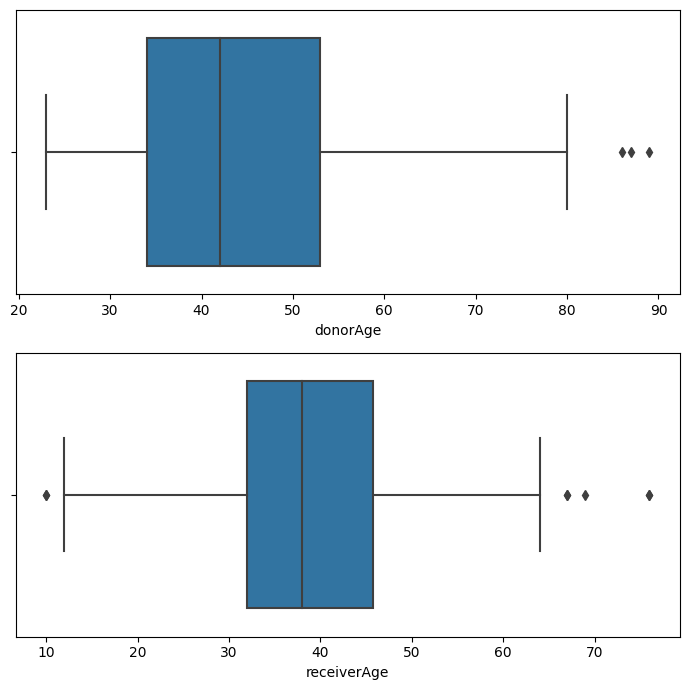

In [ ]:
# outliers detection in age
fig, axs = plt.subplots(2, figsize = (7,7))
plt1 = sns.boxplot(x = df1['donorAge'], ax = axs[0])
plt2 = sns.boxplot(x = df1['receiverAge'], ax = axs[1])
plt.tight_layout()

In [ ]:
# check missing values in variables

df1.isnull().sum()

donorAge       0
receiverAge    0
DonorBG        0
RecBG          0
D_Organ        0
R_Organ        0
D_Virology     0
R_Virology     0
MatchOrNot     0
dtype: int64

In [ ]:
#Encoding Age
#23 - 89 #10 - 76
for i in range(250):
  if(df1['donorAge'][i]>=10 and df1['donorAge'][i]<=30):
    df1['donorAge'][i]=1
  if(df1['donorAge'][i]>=31 and df1['donorAge'][i]<=60):
    df1['donorAge'][i]=2
  if(df1['donorAge'][i]>=61 and df1['donorAge'][i]<=90):
    df1['donorAge'][i]=3


for i in range(250):
  if(df1['receiverAge'][i]>=10 and df1['receiverAge'][i]<=30):
    df1['receiverAge'][i]=1
  if(df1['receiverAge'][i]>=31 and df1['receiverAge'][i]<=60):
    df1['receiverAge'][i]=2
  if(df1['receiverAge'][i]>=61 and df1['receiverAge'][i]<=90):
    df1['receiverAge'][i]=3

In [ ]:
#Dummy variables for Blood Group
for i in range(250):
  if(df1['DonorBG'][i]=="A"):
    df1['DonorBG'][i]=1
  if(df1['DonorBG'][i]=="B"):
    df1['DonorBG'][i]=2
  if(df1['DonorBG'][i]=="AB"):
    df1['DonorBG'][i]=3
  if(df1['DonorBG'][i]=="O"):
    df1['DonorBG'][i]=4

for i in range(250):
  if(df1['RecBG'][i]=="A"):
    df1['RecBG'][i]=1
  if(df1['RecBG'][i]=="B"):
    df1['RecBG'][i]=2
  if(df1['RecBG'][i]=="AB"):
    df1['RecBG'][i]=3
  if(df1['RecBG'][i]=="O"):
    df1['RecBG'][i]=4

In [ ]:
# encoding D_Organ and R_Organ
for i in range(250):
  if(df1['D_Organ'][i]=="Eyes"):
    df1['D_Organ'][i] = 1
  if(df1['D_Organ'][i]=="Heart"):
    df1['D_Organ'][i] = 2
  if(df1['D_Organ'][i]=="Liver"):
    df1['D_Organ'][i] = 3
  if(df1['D_Organ'][i]=="Lungs"):
    df1['D_Organ'][i] = 4
  if(df1['D_Organ'][i]=="Kidney"):
    df1['D_Organ'][i] = 5
  if(df1['D_Organ'][i]=="Pancreas"):
    df1['D_Organ'][i] = 6
  if(df1['D_Organ'][i]=="Small Bowel"):
    df1['D_Organ'][i] = 7

for i in range(250):
  if(df1['R_Organ'][i]=="Eyes"):
    df1['R_Organ'][i] = 1
  if(df1['R_Organ'][i]=="Heart"):
    df1['R_Organ'][i] = 2
  if(df1['R_Organ'][i]=="Liver"):
    df1['R_Organ'][i] = 3
  if(df1['R_Organ'][i]=="Lungs"):
    df1['R_Organ'][i] = 4
  if(df1['R_Organ'][i]=="Kidney"):
    df1['R_Organ'][i] = 5
  if(df1['R_Organ'][i]=="Pancreas"):
    df1['R_Organ'][i] = 6
  if(df1['R_Organ'][i]=="Small Bowel"):
    df1['R_Organ'][i] = 7

In [ ]:
df1.head()

,donorAge,receiverAge,DonorBG,RecBG,D_Organ,R_Organ,D_Virology,R_Virology,MatchOrNot
0,2,2,1,3,3,3,0,0,1
1,2,2,4,2,5,2,0,0,0
2,2,2,2,4,6,5,0,0,0
3,1,1,3,3,7,7,0,0,1
4,2,2,4,2,2,2,0,0,1


In [ ]:
X = df1.drop(['MatchOrNot'], axis=1)

y = df1['MatchOrNot']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
X_train.shape, X_test.shape

((175, 8), (75, 8))

In [ ]:
X_train.head()

,donorAge,receiverAge,DonorBG,RecBG,D_Organ,R_Organ,D_Virology,R_Virology
106,2,2,4,1,7,7,1,1
243,2,1,4,2,3,2,0,0
4,2,2,4,2,2,2,0,0
219,2,2,1,3,5,5,0,0
61,3,2,4,4,2,2,0,0


In [ ]:
y_train.head()

106    0
243    0
4      1
219    1
61     0
Name: MatchOrNot, dtype: int64

In [ ]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
y_pred_gini = clf_gini.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7333


In [ ]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7943


In [ ]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.7943
Test set score: 0.7333


[Text(0.6666666666666666, 0.875, 'x[7] <= 0.5\ngini = 0.447\nsamples = 175\nvalue = [116, 59]'),
 Text(0.5, 0.625, 'x[6] <= 0.5\ngini = 0.498\nsamples = 111\nvalue = [52, 59]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= 3.5\ngini = 0.488\nsamples = 102\nvalue = [43, 59]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.49\nsamples = 49\nvalue = [28, 21]'),
 Text(0.5, 0.125, 'gini = 0.406\nsamples = 53\nvalue = [15, 38]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 64\nvalue = [64, 0]')]

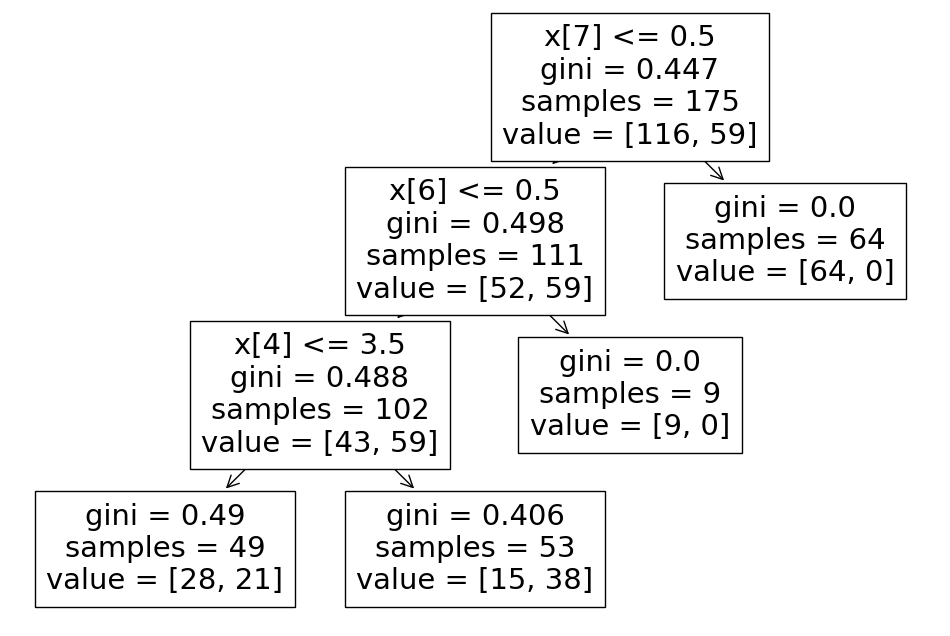

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(X_train, y_train))

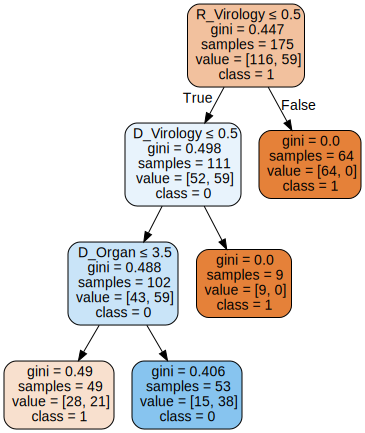

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_gini, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)
graph

In [ ]:
# instantiate the DecisionTreeClassifier model with criterion entropy
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [ ]:
y_pred_en = clf_en.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7467


In [ ]:
y_pred_train_en = clf_en.predict(X_train)
y_pred_train_en

array([0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.7543


In [ ]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.7543
Test set score: 0.7467


[Text(0.6666666666666666, 0.875, 'x[7] <= 0.5\nentropy = 0.922\nsamples = 175\nvalue = [116, 59]'),
 Text(0.5, 0.625, 'x[6] <= 0.5\nentropy = 0.997\nsamples = 111\nvalue = [52, 59]'),
 Text(0.3333333333333333, 0.375, 'x[4] <= 5.5\nentropy = 0.982\nsamples = 102\nvalue = [43, 59]'),
 Text(0.16666666666666666, 0.125, 'entropy = 1.0\nsamples = 81\nvalue = [40, 41]'),
 Text(0.5, 0.125, 'entropy = 0.592\nsamples = 21\nvalue = [3, 18]'),
 Text(0.6666666666666666, 0.375, 'entropy = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(0.8333333333333334, 0.625, 'entropy = 0.0\nsamples = 64\nvalue = [64, 0]')]

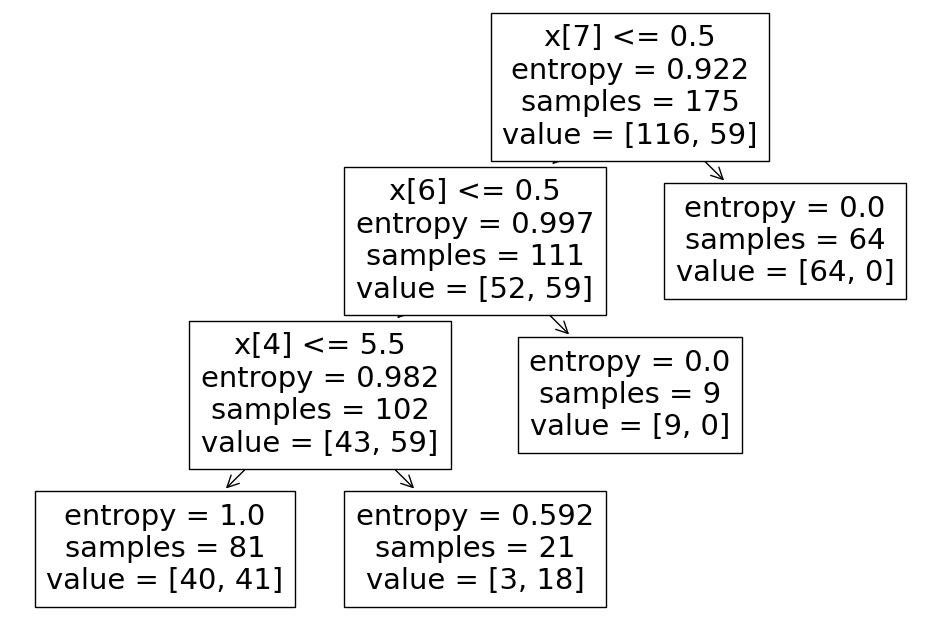

In [ ]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

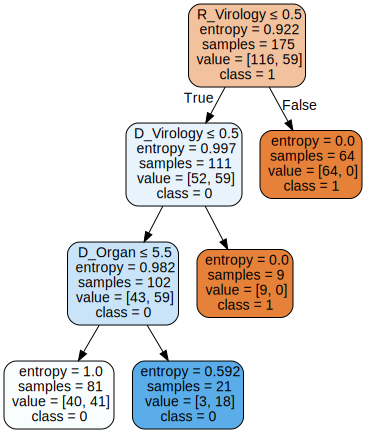

In [ ]:
import graphviz
dot_data = tree.export_graphviz(clf_en, out_file=None,
                              feature_names=X_train.columns,
                              class_names=str(y_train),
                              filled=True, rounded=True,
                              special_characters=True)

graph = graphviz.Source(dot_data)

graph

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[37 18]
 [ 1 19]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.97      0.67      0.80        55
           1       0.51      0.95      0.67        20

    accuracy                           0.75        75
   macro avg       0.74      0.81      0.73        75
weighted avg       0.85      0.75      0.76        75



## **Prediction with Gradient Boosting classifier**

In [ ]:
# import machine learning algorithms
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
# train with Gradient Boosting algorithm
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.754
Accuracy score (test): 0.760

Learning rate:  0.1
Accuracy score (training): 0.811
Accuracy score (test): 0.813

Learning rate:  0.25
Accuracy score (training): 0.880
Accuracy score (test): 0.813

Learning rate:  0.5
Accuracy score (training): 0.880
Accuracy score (test): 0.827

Learning rate:  0.75
Accuracy score (training): 0.903
Accuracy score (test): 0.800

Learning rate:  1
Accuracy score (training): 0.960
Accuracy score (test): 0.867



As we can see, in learning rate 1, we are getting the highest accuracy. And the accuracy scores for train and test data are comparable, so there is no sign of overfitting or underfitting.

In [ ]:
# Output confusion matrix and classification report of Gradient Boosting algorithm on validation set

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))
print()
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix:
[[48  7]
 [ 3 17]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.87      0.91        55
           1       0.71      0.85      0.77        20

    accuracy                           0.87        75
   macro avg       0.82      0.86      0.84        75
weighted avg       0.88      0.87      0.87        75



## **Prediction** Using SVM Classifier

In [ ]:
cols = X_train.columns

In [ ]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [ ]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [ ]:
X_train.describe()

,donorAge,receiverAge,DonorBG,RecBG,D_Organ,R_Organ,D_Virology,R_Virology
count,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02,1.750000e+02
mean,-8.754902e-17,-2.537653e-17,-7.612958e-17,-1.928616e-16,6.090366e-17,4.060244e-17,2.537653e-17,7.866723e-17
std,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00,1.002869e+00
min,-1.699194e+00,-1.755167e+00,-1.220872e+00,-1.477235e+00,-1.603361e+00,-1.631155e+00,-6.680427e-01,-7.593264e-01
25%,9.212496e-02,5.033201e-01,-1.220872e+00,-4.905322e-01,-1.024828e+00,-1.065903e+00,-6.680427e-01,-7.593264e-01
50%,9.212496e-02,5.033201e-01,-3.797199e-01,4.961705e-01,1.322359e-01,6.460021e-02,-6.680427e-01,-7.593264e-01
75%,9.212496e-02,5.033201e-01,1.302584e+00,4.961705e-01,7.107681e-01,6.298521e-01,1.496910e+00,1.316957e+00
max,1.883444e+00,2.761808e+00,1.302584e+00,1.482873e+00,1.867832e+00,1.760356e+00,1.496910e+00,1.316957e+00


#### Running SVM with default hyperparameters

In [ ]:
# import SVC classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# instantiate classifier with default hyperparameters
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

 # Accuracy
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.8133


#### Running SVM with rbf kernel and C=100.0

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8400


#### Running SVM with rbf kernel and C=1000.0

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=1000.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8267


#### Running SVM with linear kernel

In [ ]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0)
linear_svc.fit(X_train,y_train)
y_pred_test=linear_svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.7600


#### Run SVM with linear kernel and C=100.0

In [ ]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0)
linear_svc100.fit(X_train, y_train)
y_pred=linear_svc100.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.7467


As we are getting the accuracy of .8400 with rbf kernel and c = 100, calculating the accuracy for training data for this.

In [ ]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0)
svc.fit(X_train,y_train)
y_pred=svc.predict(X_train)

y_pred

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [ ]:
# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_train, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9886


In [ ]:
# check class distribution in test set

y_test.value_counts()

0    55
1    20
Name: MatchOrNot, dtype: int64

In [ ]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


# **Predication using Random Forest Classifier**

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        df2 = pd.DataFrame(y_test)
        df2['Predictions'] = pred
        print(df2.head(n=10))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.991453   1.000000  0.994286    0.995726      0.994335
recall       1.000000   0.983051  0.994286    0.991525      0.994286
f1-score     0.995708   0.991453  0.994286    0.993581      0.994274
support    116.000000  59.000000  0.994286  175.000000    175.000000
_______________________________________________
Confusion Matrix: 
 [[116   0]
 [  1  58]]

Test Result:
Accuracy Score: 89.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0     1  accuracy  macro avg  weighted avg
precision   0.927273   0.8  0.893333   0.863636      0.893333
recall      0.927273   0.8  0.893333   0.863636      0.893333
f1-score    0.927273   0.8  0.893333   0.863636      0.893333
support    55.000000  20.0  0.893333  75.000000     75.000000
______________________________________

# **Random Forest Hyperparamter Tuning**

**a) Randomized Search Cross Validation**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap
}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(
    estimator=rf_clf,
    scoring='f1',
    param_distributions=random_grid,
    n_iter=50,
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best paramters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True})
Train Result:
Accuracy Score: 99.43%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.991453   1.000000  0.994286    0.995726      0.994335
recall       1.000000   0.983051  0.994286    0.991525      0.994286
f1-score     0.995708   0.991453  0.994286    0.993581      0.994274
support    116.000000  59.000000  0.994286  175.000000    175.000000
_______________________________________________
Confusion Matrix: 
 [[116   0]
 [  1  58]]

Test Result:
Accuracy Score: 85.33%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.892857   0.736842  0.853333   0.814850      0.851253
recal

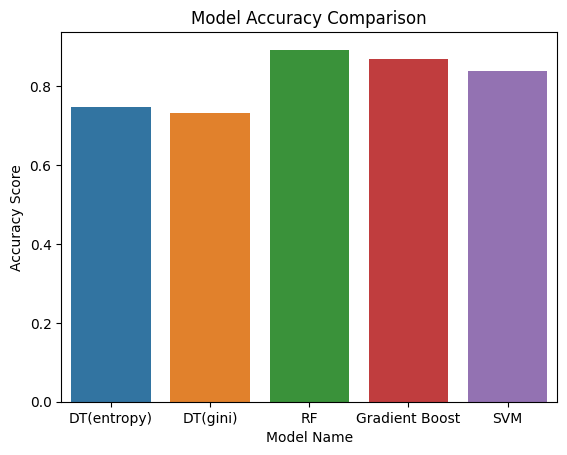

In [ ]:
train_accuracy = [.7467, .7333, .8933, .87,.8400]
model = ["DT(entropy)", "DT(gini)", "RF", "Gradient Boost", "SVM"]

data = {'Model Name': model, 'Accuracy Score': train_accuracy}
df = pd.DataFrame(data)

sns.barplot(x='Model Name', y='Accuracy Score', data=df)
plt.title('Model Accuracy Comparison')
plt.show()